In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [3]:
# create a dataframe with cities from the random list generated
city_weather = pd.DataFrame(cities,columns=['City'])
city_weather.head()

,City
0,port alfred
1,atuona
2,illoqqortoormiut
3,ushuaia
4,georgetown


In [4]:
# create and append empty columns to city_weather dataframe
city_weather['Lat'] = ''
city_weather['Lng'] = ''
city_weather['Max Temp'] = ''
city_weather['Humidity'] = ''
city_weather['Cloudiness'] = ''
city_weather['Wind Speed'] = ''
city_weather['Country'] = ''
city_weather['Date'] = ''

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,,,,,,,,
1,atuona,,,,,,,,
2,illoqqortoormiut,,,,,,,,
3,ushuaia,,,,,,,,
4,georgetown,,,,,,,,


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={weather_api_key}&q="

In [6]:
print(f'Beginning Data Retrieval')
print(f'-------------------------------------')

record = 0
set_count = 1

for index, row in city_weather.iterrows():
    
    record = record + 1

    
    city_name = row['City']
    
    weather_response = requests.get(query_url + city_name)
    weather_json = weather_response.json()
    
    
    try:
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        city_weather.loc[index, 'Lat'] = weather_json['coord']['lat']
        city_weather.loc[index, 'Lng'] = weather_json['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        city_weather.loc[index, 'Humidity'] = weather_json['main']['humidity']
        city_weather.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        city_weather.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        city_weather.loc[index, 'Country'] = weather_json['sys']['country']
        city_weather.loc[index, 'Date'] = weather_json['dt']
        
    except (KeyError, IndexError):
        
        print(f'City not found. Skipping...')
    if record == 50:
        set_count = set_count+1
        record = 0

print(f'-------------------------------------')
print(f'Data Retrieval Complete')
print(f'-------------------------------------')    

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ixtapa
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | talaja
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | yenagoa
Processing Record 14 of Set 1 | shahreza
Processing Record 15 of Set 1 | sedelnikovo
City not found. Skipping...
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | okha
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | savannah bight
Processing Reco

Processing Record 34 of Set 4 | airai
Processing Record 35 of Set 4 | jamestown
Processing Record 36 of Set 4 | mitsamiouli
Processing Record 37 of Set 4 | tigil
Processing Record 38 of Set 4 | pryyutivka
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | tall kayf
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | teya
Processing Record 46 of Set 4 | kilindoni
Processing Record 47 of Set 4 | akita
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | yeniseysk
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | melilla
Processing Record 2 of Set 5 | ler
Processing Record 3 of Set 5 | monrovia
Processing Record 4 of Set 5 | haradok
Processing Record 5 of Set 5 | shingu
Processing Record 6 of Set 5 | ocho rios
Processing

Processing Record 25 of Set 8 | robertsport
Processing Record 26 of Set 8 | banda aceh
Processing Record 27 of Set 8 | manoel urbano
Processing Record 28 of Set 8 | kristianstad
Processing Record 29 of Set 8 | vao
Processing Record 30 of Set 8 | temaraia
City not found. Skipping...
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | boone
Processing Record 33 of Set 8 | praia
Processing Record 34 of Set 8 | nguiu
City not found. Skipping...
Processing Record 35 of Set 8 | sao joao da barra
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | yaan
Processing Record 38 of Set 8 | kodiak
Processing Record 39 of Set 8 | makokou
Processing Record 40 of Set 8 | ijaki
City not found. Skipping...
Processing Record 41 of Set 8 | badacsonytomaj
Processing Record 42 of Set 8 | andenes
Processing Record 43 of Set 8 | havlickuv brod
Processing Record 44 of Set 8 | nador
Processing Record 45 of Set 8 | shiraz
Processing Record 46 of Set 8 | muniz freire
Processin

Processing Record 12 of Set 12 | trofors
Processing Record 13 of Set 12 | bonthe
Processing Record 14 of Set 12 | ouallam
Processing Record 15 of Set 12 | gornopravdinsk
Processing Record 16 of Set 12 | mehamn
Processing Record 17 of Set 12 | christchurch
Processing Record 18 of Set 12 | chanika
Processing Record 19 of Set 12 | acarau
Processing Record 20 of Set 12 | painesville
Processing Record 21 of Set 12 | marzuq
Processing Record 22 of Set 12 | tambura
Processing Record 23 of Set 12 | tiarei
Processing Record 24 of Set 12 | sinkat
City not found. Skipping...
Processing Record 25 of Set 12 | caboolture
Processing Record 26 of Set 12 | aflu
City not found. Skipping...
Processing Record 27 of Set 12 | quatre cocos
Processing Record 28 of Set 12 | port macquarie
Processing Record 29 of Set 12 | kalengwa
Processing Record 30 of Set 12 | valley
Processing Record 31 of Set 12 | susanville
Processing Record 32 of Set 12 | santiago del estero
Processing Record 33 of Set 12 | ilo
Processin

In [7]:
city_weather


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,285.75,70,100,14.59,ZA,1597783696
1,atuona,-9.8,-139.03,299.35,74,2,9.49,PF,1597783696
2,illoqqortoormiut,,,,,,,,
3,ushuaia,-54.8,-68.3,274.15,90,90,11.8,AR,1597783696
4,georgetown,5.41,100.34,300.15,94,20,1.8,MY,1597783521
...,...,...,...,...,...,...,...,...,...
587,urosevac,,,,,,,,
588,suslovo,56.22,88.12,288.35,93,100,4.58,RU,1597783782
589,bida,9.08,6.02,297.43,92,80,0.14,NG,1597783782
590,yialos,,,,,,,,


In [8]:
# convert columns to appropriate format, and convert Max Temp from Kelvin to Fahrenheit

city_weather['Lat'] = pd.to_numeric(city_weather['Lat'])
city_weather['Lng'] = pd.to_numeric(city_weather['Lng'])
city_weather['Max Temp'] = pd.to_numeric(city_weather['Max Temp'])
city_weather['Max Temp'] = (((city_weather['Max Temp'] - 273.15) * (9/5)) + 32)
city_weather['Humidity'] = pd.to_numeric(city_weather['Humidity'])
city_weather['Cloudiness'] = pd.to_numeric(city_weather['Cloudiness'])
city_weather['Wind Speed'] = pd.to_numeric(city_weather['Wind Speed'])
city_weather['Date'] = pd.to_datetime(city_weather['Date'], unit = 's')

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,54.68,70.0,100.0,14.59,ZA,2020-08-18 20:48:16
1,atuona,-9.80,-139.03,79.16,74.0,2.0,9.49,PF,2020-08-18 20:48:16
2,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,,NaT
3,ushuaia,-54.80,-68.30,33.80,90.0,90.0,11.80,AR,2020-08-18 20:48:16
4,georgetown,5.41,100.34,80.60,94.0,20.0,1.80,MY,2020-08-18 20:45:21


In [11]:
#convert date to month day year and save to a variable to use in chart titles
city_weather['Date'] = pd.to_datetime(city_weather['Date'])
city_weather['Date'] = city_weather['Date'].dt.strftime('%m-%d-%Y')

date = city_weather.loc[1,"Date"]

In [26]:
#convert wind speed from meters per second to mph for every 1 m/s = 2.237 mph

city_weather['Wind Speed'] = city_weather['Wind Speed']*2.237

In [27]:
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,54.68,70.0,100.0,32.63783,ZA,08-18-2020
1,atuona,-9.80,-139.03,79.16,74.0,2.0,21.22913,PF,08-18-2020
2,illoqqortoormiut,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,ushuaia,-54.80,-68.30,33.80,90.0,90.0,26.39660,AR,08-18-2020
4,georgetown,5.41,100.34,80.60,94.0,20.0,4.02660,MY,08-18-2020


In [28]:
# Remove blank rows and save to csv

city_weather_clean = city_weather.dropna(how = 'any')
city_weather_clean.to_csv("city_weather_clean.csv", index = False)

#check length
len(city_weather_clean['City'])

538

In [18]:
#check for humidity values over 100
Humidity_over_100 = city_weather_clean.loc[city_weather_clean['Humidity'] > 100]

Humidity_over_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# no cities have humidity over 100%, so need to do any removal

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

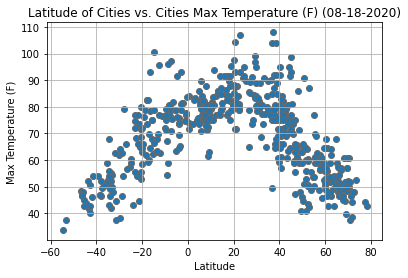

In [23]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Max Temp']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Cities vs. Cities Max Temperature (F) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

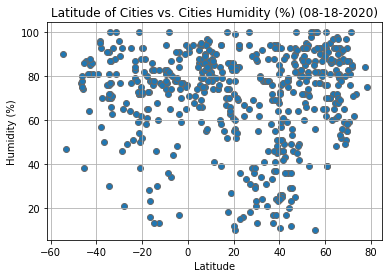

In [24]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Humidity']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Cities vs. Cities Humidity (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

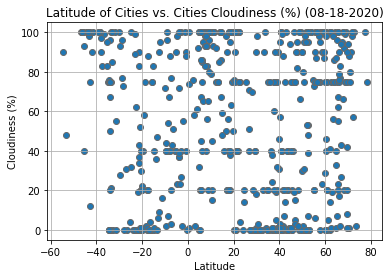

In [25]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Cloudiness']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Cities vs. Cities Cloudiness (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

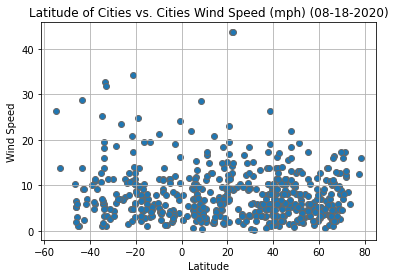

In [31]:
# set x,y values
x_values = city_weather_clean['Lat']
y_values = city_weather_clean['Wind Speed']

# add grid to plot
plt.grid()

# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Cities vs. Cities Wind Speed (mph) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [30]:
# Create Northern and Southern Hemisphere DataFrames

Northern_Hemi = city_weather_clean.loc[city_weather_clean['Lat'] > 0]

Southern_Hemi = city_weather_clean.loc[city_weather_clean['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7309617769574978


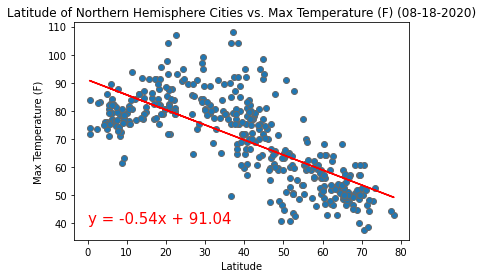

In [38]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Max Temp']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Northern Hemisphere Cities vs. Max Temperature (F) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (0,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7888283081312039


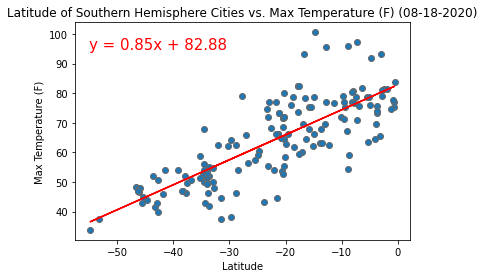

In [50]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Max Temp']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Southern Hemisphere Cities vs. Max Temperature (F) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-55,95), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03405892128591604


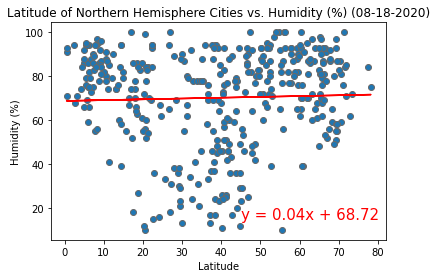

In [42]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Humidity']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Northern Hemisphere Cities vs. Humidity (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (45,15), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.11625288866041122


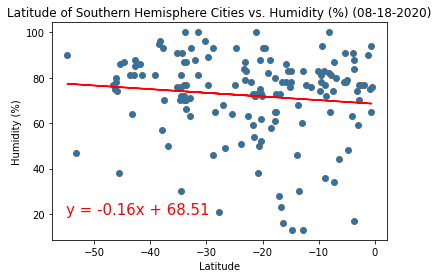

In [52]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Humidity']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Southern Hemisphere Cities vs. Humidity (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-55,20), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.039409896681170176


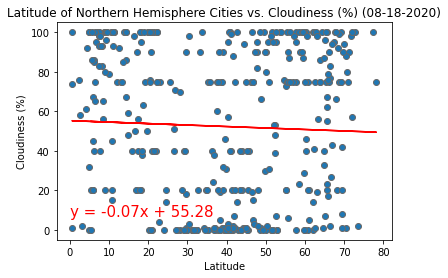

In [45]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Cloudiness']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Northern Hemisphere Cities vs. Cloudiness (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (0,7), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.30963510220393814


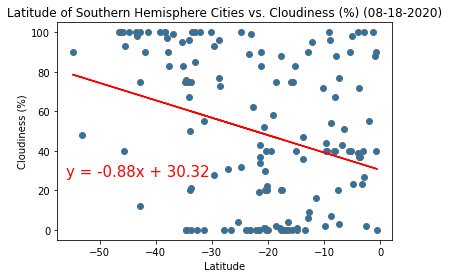

In [57]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Cloudiness']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Southern Hemisphere Cities vs. Cloudiness (%) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-56,27), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.055741870810576986


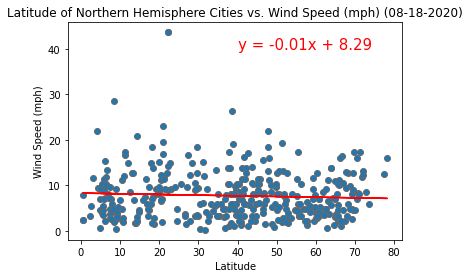

In [47]:
# set x,y values
x_values = Northern_Hemi['Lat']
y_values = Northern_Hemi['Wind Speed']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Northern Hemisphere Cities vs. Wind Speed (mph) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (40,40), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09861916543627866


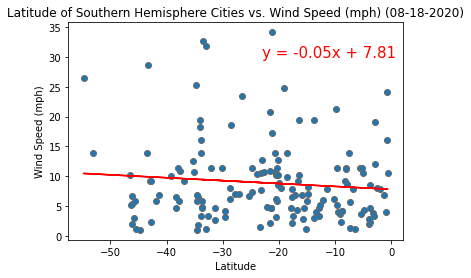

In [62]:
# set x,y values
x_values = Southern_Hemi['Lat']
y_values = Southern_Hemi['Wind Speed']


# Create a scatter plot
plt.scatter(x_values, y_values, facecolors = 'tab:blue', edgecolors = 'dimgray')
plt.title(f'Latitude of Southern Hemisphere Cities vs. Wind Speed (mph) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Regeression Analysis Time (and line formula - good ol' y=mx+b) !!!
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.annotate(line_eq, (-23,30), fontsize = 15, color="red")

plt.plot(x_values, regress_values, "r-")

print(f"The r-squared is: {rvalue}")

plt.show()